# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27566,56,Private,134286,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K
8964,22,Private,199266,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,30,United-States,<=50K
25336,54,Federal-gov,27432,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
10542,36,Private,146412,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
22632,35,Private,165930,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
7021,44,State-gov,33658,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,50,United-States,>50K
33,30,Federal-gov,59951,Some-college,10,Married-civ-spouse,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
29900,38,Private,91039,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,65,United-States,>50K
17411,37,Private,256636,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
27773,17,Private,57723,11th,7,Never-married,Sales,Own-child,White,Male,0,0,30,United-States,<=50K


In [3]:
print("\nProcent lipsuri pe coloană (%):")
print((data.isna().mean() * 100).round(2))


Procent lipsuri pe coloană (%):
age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64


In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
print("Skew:")
print(data.skew(numeric_only=True).sort_values())
print("\nKurt:")
data.kurtosis(numeric_only=True).sort_values()

Skew:
education-num     -0.311676
hours-per-week     0.227643
age                0.558743
fnlwgt             1.446980
capital-loss       4.594629
capital-gain      11.953848
dtype: float64

Kurt:


age                -0.166127
education-num       0.623444
hours-per-week      2.916687
fnlwgt              6.218811
capital-loss       20.376802
capital-gain      154.799438
dtype: float64

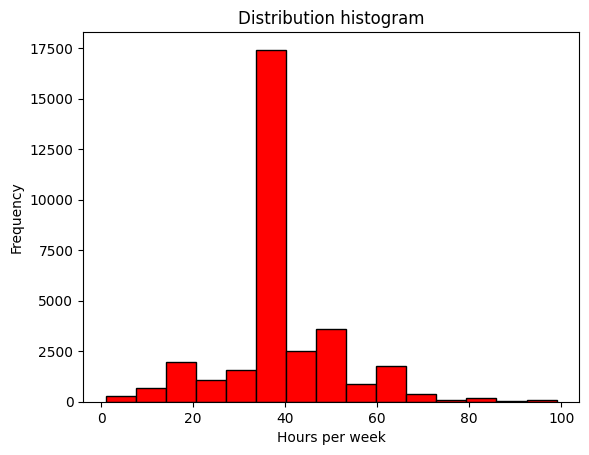

In [6]:
plt.hist(data['hours-per-week'], bins=15, color='red', edgecolor='black')
plt.xlabel('Hours per week')
plt.ylabel('Frequency')
plt.title('Distribution histogram')
plt.show()

<Axes: xlabel='hours-per-week', ylabel='Count'>

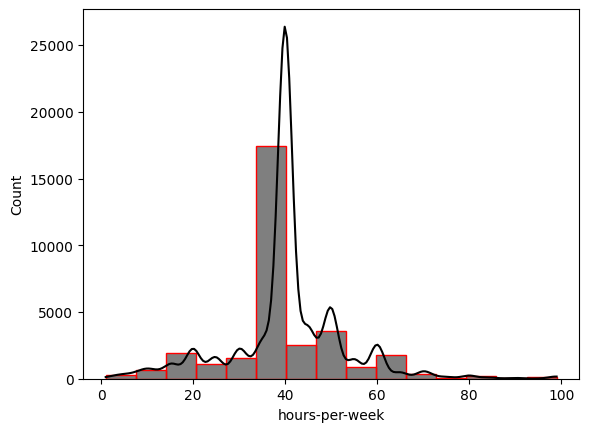

In [7]:
sns.histplot(data["hours-per-week"], bins=15, kde=True, color='black', edgecolor='red')

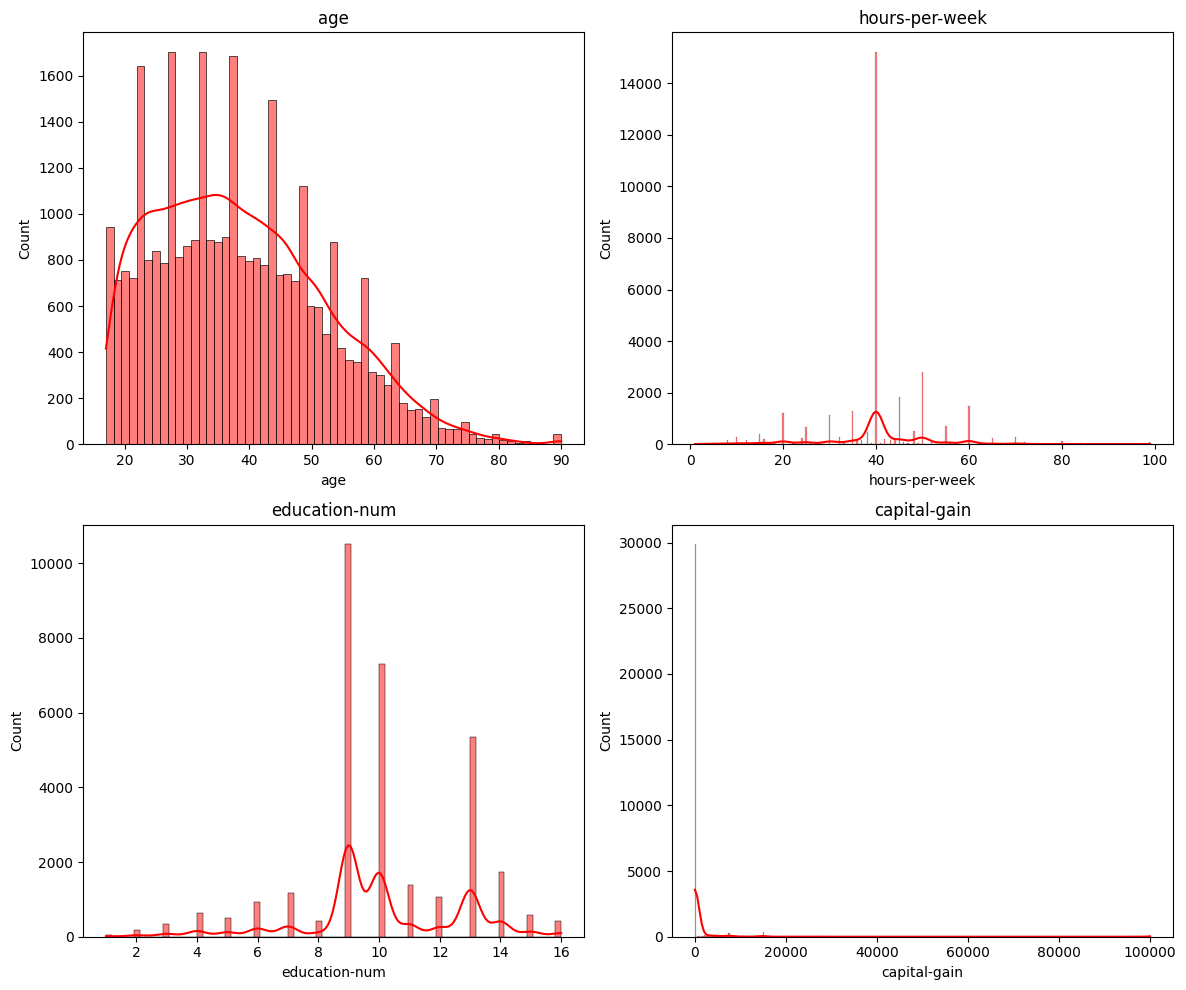

In [8]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes = axes.flatten()

for i, col in enumerate(['age', 'hours-per-week', 'education-num', 'capital-gain']):
    sns.histplot(data[col], ax=axes[i], kde=True, color = 'red')
    axes[i].set_title(col)

plt.tight_layout()

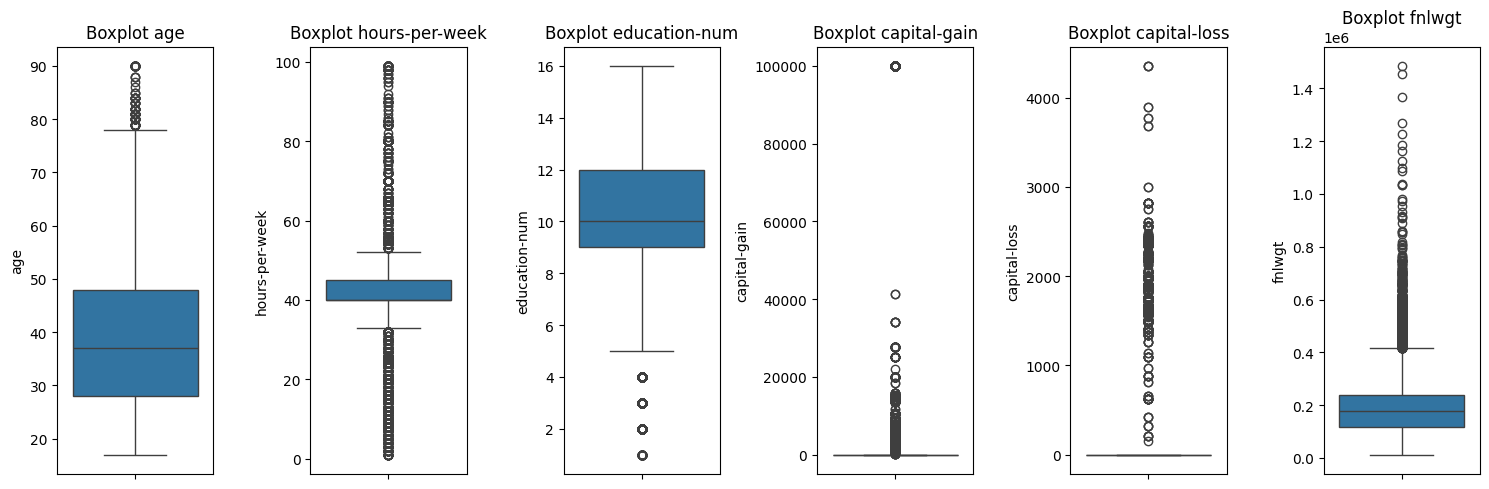

In [9]:
cols_to_plot = ['age', 'hours-per-week', 'education-num', 'capital-gain', 'capital-loss', 'fnlwgt'] 

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(15, 5))

for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

<Axes: ylabel='sex'>

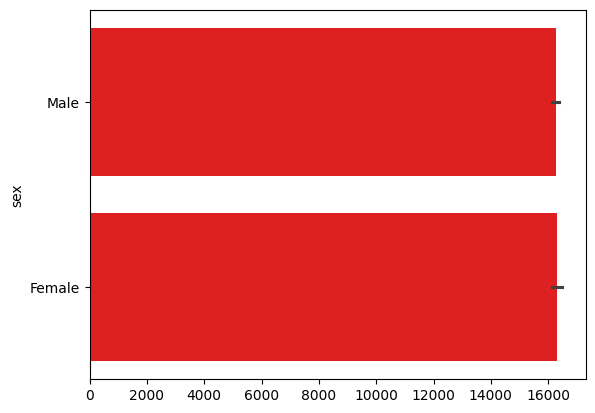

In [17]:
sns.barplot(data['sex'], color = 'red')

<Axes: ylabel='race'>

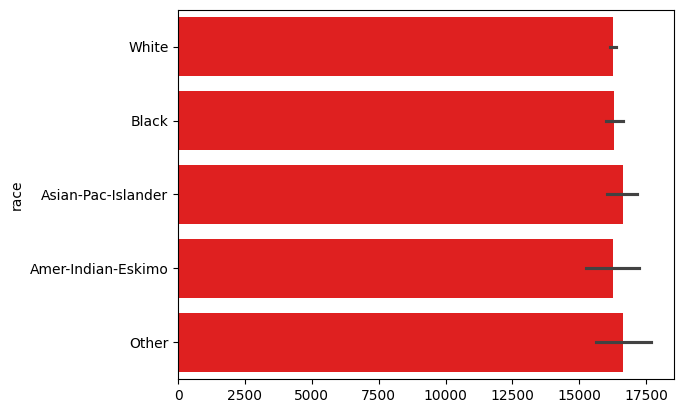

In [18]:
sns.barplot(data['race'], color = 'red')

<Axes: ylabel='relationship'>

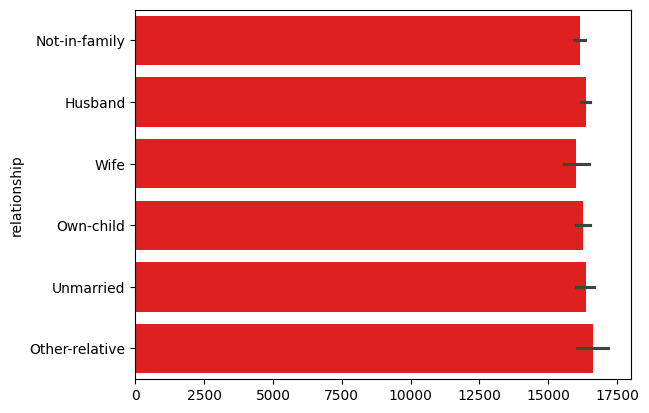

In [21]:
sns.barplot(data['relationship'], color = 'red')